# Classical Statistical Inference: Basic concepts

## Table of Content

- II. What is statistical inference ? 
    * II.1 [Point estimate](#II.1-Point-estimate:)
        - II.1.1 [Central limit theorem](#II.1.1-Central-limit-theorem)
        - II.1.2 [Summary of useful statistics](#II.1.2-Summary-of-useful-statistics)
        - II.1.3 [Distributions of estimators](#II.1.3-Distributions-of-estimators)
    * II.2 Confidence interval: See [Frequentist_inference_02.ipynb](Frequentist_inference_02.ipynb)
    * II.3 Hypothesis testing: See [Frequentist_inference_H_test.ipynb](Frequentist_inference_H_test.ipynb) 
    * II.4 Uncertainty calculation using Monte-Carlo method. See [Frequentist_inference_Monte_Carlo.ipynb](Frequentist_inference_Monte_Carlo.ipynb)
    * II.5 Bootstrap and Jacknife: See [Frequentist_inference_Bootstrap.ipynb](Frequentist_inference_Bootstrap.ipynb)  
    * II.6 Wrap up: Various approaches of hypothesis testing: See [Frequentist_inference_H_test.ipynb](Frequentist_inference_H_test.ipynb)
    
- X. [References and supplementary material](#X)

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import scipy.stats
import astropy.stats

## II. What is statistical inference?  <a class="anchor" id="II"></a>

Statistical inference is the process that consists in deriving information about a phenomenon/something based on a data set. This includes what computer scientist call "learning", which is the process of using data to infer the distribution that "generated" the data (also called parent distribution). 

Statistical inference implies first to define a **statistical model** (or several) that describe(s) the data. This can be distribution function(s) but also a regression law(s), that is (are) parametrized by a finite number of parameters, generally denoted $\theta$ in most of statistical books. Then, the remaining of the "game" is to confront this model to the data to see if it is well suited, and whether we can infer the values of its parameters.  

There is basically three types of inference one draws from data:
- **Point estimation**: What is the best estimate for a model parameter $\theta$ based on the available data? 
- **Confidence estimation**: How confident should we be about our point estimate? 
- **Hypothesis testing**: Are the data at hand consistent with a given hypothesis or model? 

This is common to any statistical paradigm (i.e. Frequentist and Bayesian). We will see first how statistical inference is performed under the "classical" (aka frequentist) paradigm. In a future lecture, we will see the Bayesian approach and try to understand the "philosphical" differences between those. 

### II. 1 Point estimate:

Point estimates are estimates of *population parameters based on sample data*. For example, we may want to estimate the mean color of elliptical galaxies at a given redshift based on a subsample drawn from a survey. We would derive a mean value that may differ from the true population mean for several reasons: statistical fluctuation due to the limited size of the sample, bias in selection, ...  

For frequentists, this consists in deriving a single **best** guess for a quantity of interest, that can be a parameter in a parametric model, a regression function, a CDF $H(x)$, a pdf $h(x)$ or predictions for a future value $Y$ of a random variable. 

By convention, the point estimate of a parameter $\theta$ is denoted $\hat{\theta}$. Remember that here, there is one *single fixed value* of $\theta$, while the estimator $\hat{\theta}$ depends on the data, and is therefore a random variable.   

A point estimator $\hat{\theta}$ of a parameter $\theta$ is a function of the random variables $X_1$, $X_2$, ... such that:    
$$
\hat{\theta} = g(X_1, X_2, X_3, ... X_n)
$$

As for any estimator you have encountered in descriptive statistics, this estimator can be biased (i.e. its value could differ from its true value by some amount), and be characterized by some variance (remember that $\hat{\theta}$ is a random variable). On a statistical point of view, it is important for a point estimator $\hat{\theta}$ to be  **consistent** which means that it **asymptotically converges** to the true parameter value (with asymptotically null variance). 

The distribution of $\hat{\theta}$ is called the **sampling distribution**.  

#### Illustrative exercise

Let's do this though experiment. You are "God" and know that the population distribution of galaxy $I-$band magnitudes at a specific redshift is described by the sum of 3 Gaussian distribution $N1 = \mathcal{N}(18, 1.7)$, $N2 = \mathcal{N}(20, 0.7)$, $N3 = \mathcal{N}(21, 2.0)$. (18, 20, 21 are the mean of the distributions, and 1.7, 0.7, 2.0 their standard deviations).   
- Use scipy to calculate the PDF associated to the population of galaxies 
- Calculate (without scipy) what is the mean magnitude of the population
- Draw a sample of 90 galaxies from this population. 
- Calculate the point estimate of the mean from this sample
- Calculate the sampling distribution associated to the mean for a mean magnitude infered from  a sample of 90 galaxies 

In [ ]:
# Define and plot the PDF associated to the population distribution

N1 = scipy.stats.norm(, )
N2 = scipy.stats.norm(, )
N3 = scipy.stats.norm(, )
x = np.arange(14, 26, 0.1)
population_pdf = (N1.(x) + N2.(x) + N3.(x)) / 3.
f, ax = plt.subplots(ncols=1, figsize=(8,5))
ax.plot(x, population_pdf)

# What is the mean magnitude of the population (scipy is not needed for this) ? 
mean_mag = 
print(mean_mag)
id_mean_in_x = np.searchsorted(x, mean_mag)
ax.vlines(mean_mag, 0, population_pdf[id_mean_in_x])

In [ ]:
# Draw a sample of 90 galaxies from this population.
# Tip: merge 3 samples of 30 galaxies drawn from N1, N2, N3
s1 = N1.rvs()
s2 = N2.rvs()
s3 = N3.rvs()
s_tot = np.concatenate([s1, s2, s3])
f, ax = plt.subplots(ncols=1, figsize=(8,5))
ax.hist(s_tot)

# Calculate the point estimate of the mean from this sample
print('Point estimate of the mean is: %.3f'%   )

In [5]:
# Based on the above cell, 
# Let's create a function that generate a random sample and returns the mean 
def make_random_sample(N1, N2, N3):
    '''
    Parameters: 
    N1, N2, N3: scipy.stats.norm() for the 3 distributions making the parent population 
    Returns: 
    mean (float): Point estimate of the mean 
    '''

    return mean

In [6]:
#Calculate the sampling distribution associated to the mean 
# for a mean magnitude infered from  a sample of 90 galaxies
Nsample =   # Number of samples for which we will calculate the mean
val_mean_samples = np.zeros(Nsample)   # I create an array to save the mean of each experiment
for i in range(Nsample):
    val_mean_samples[i] = make_random_sample(N1, N2, N3)

In [ ]:
# Show the distribution of the means from those Nsample
f, ax = plt.subplots(ncols=1, figsize=(8,5))
ax.hist(val_mean_samples, bins=30);
ax.set_xlabel(r'$\hat{\theta}$', size=18)
ax.set_ylabel('Sampling PDF', color='blue');

### II.1.1 Central limit theorem

An important theorem to keep in mind when studying point estimates is the **central limit theorem** which states that: when independent random variables are added, their sum tends toward a normal distribution even if the original variables themselves are not normally distributed. For that reason, if you want to measure the arithmetic mean $\mu$ of a population, you can be sure that the *sampling distribution* of $\hat{\mu}$ will tend towards a normal distribution.    


**Exercise:** 

Verify empirically the central limit theorem using a uniform distribution: 

- (1) Draw $N = 10^8$ points from a uniform distribution centered on 0 and of width W=2. This is your virtual population. 
- (2) Calculate the mean based on a sample of m points (selected among your N points): e.g. $m=2, 3, 10$. Repeat this operation $k=10^5$ times. Plot the 3 histograms of the mean values for $m=2, 3, 10$. 
- (3) Overplot a normal distribution $\mathcal{N}$(0, $\sigma/\sqrt{m}$) (This is the distribution you expect from the central limit theorem). Note that for a Uniform distribution, $\sigma = W / \sqrt{12}$ (See [Descriptive_statistics_02.ipynb](../03-Basic_statistics_and_proba_concepts/Descriptive_statistics_02.ipynb)). 

In [2]:
# Import necessary packages if not done earlier
import scipy.stats 
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
# First, let's do the exercise a single value of M = 2 
# In this cell we build the population and draw a parent sample from which we will take sub-samples

# Define uniform distribution 
W =    # = scale = width of the uniform distrib
u = scipy.stats.uniform(-1,  W)  # Warning ! Uniform is constant between loc and loc+scale !

# Build the population 
# Set the number of points of the sample and the number of means to evaluate. 
nmax =  # total number of points I draw

# Generate the **population** of nmax data points  
s = u.rvs(nmax)

In [ ]:
# Create an empty array where the mean of each sample will be saved 
nsamp =  # number of samples that we will draw (we take a big nsamp to have nice -not too noisy- histograms)
muval = np.zeros(nsamp)

# Now, let's emulate the case where an experiment consists in drawing 2 values
M =  # size of the sample (# of independant RV )

# create a figure to plot the results  
f, ax = plt.subplots(nrows=1, figsize=(10,6))
nbins = 100
x = np.linspace(-1.2, 1.2, nbins)

# Let's calculate the point-estimate on the mean nsamp times
# nsamp does not matter for the CLT. 
#Large nsamp reduces the noise in the histogram 
for k in range(nsamp):  
    muval[k] = np.random.choice(s, M).mean()   # we draw our sample 
    
h1 = ax.hist(muval, bins=nbins, density=True, label='M=%i'%M)

# Overlay of a normal distribution on the histogram 
n=scipy.stats.norm(loc=0, scale=  )
ax.plot(x, n.pdf(x))
ax.legend(loc='best')

Sample std (M = 2) = 0.41 ; CLT std= 0.41
Sample std (M = 3) = 0.33 ; CLT std= 0.33
Sample std (M = 10) = 0.18 ; CLT std= 0.18


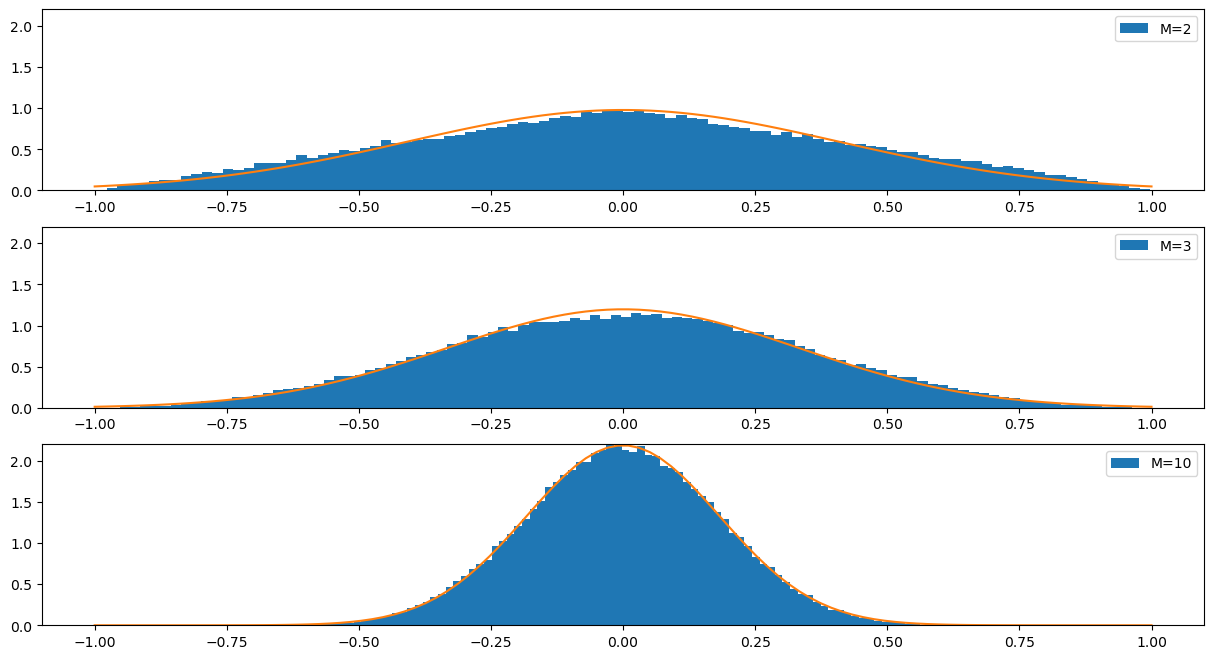

In [11]:
# Let'redo the exercise and plot the distributions for M=2,3,10 points 
# in different horizontal panels

# Define uniform distribution 
W = 2   # = scale = width of the uniform distrib
u = scipy.stats.uniform()  # Warning ! Uniform is constant between loc and loc+scale !

# Set the number of points of the sample and the number of means to evaluate. 
nmax =  # total number of points I draw
nsamp = # number of times I will calculate the mean 
# Create an empty array where the mean of each sample will be saved 
muval = np.zeros()

# Generate the population of nmax data points  
s = u.rvs()

# create a figure with 3 rows (3 panels)  
f, ax = plt.subplots(nrows=3, figsize=(15,8))
nbins = 100
x = np.linspace(-1.2, 1.2, nbins)

# Loop over the 3 values of M and calculate the mean of k subsamples for each value of M. 
# make the plot associated to each value of M within the loop 

for i, M in enumerate([2, 3, 10]):
    for k in range(nsamp):
        muval[k] = np.random.choice(s, M).mean()
    h1 = ax[i].hist(muval, bins=nbins, density=True, label='M=%i'%M)
    norm_std =   # Expected std of the gaussian 
    n=scipy.stats.norm(loc=, scale= )
    print('Sample std (M = %i) = %.2f ; CLT std= %.2f'%(M, np.std(muval, ddof=1), norm_std))
    ax[i].plot(x, n.pdf(x))
    ax[i].set_ylim(0,2.2)
    ax[i].legend(loc='best')

    

### II.1.2 Summary of useful statistics

|    Name   | Sample Statistics | Population Statistics | 
|-------|---------------|--------------------| 
|size   |             n     |        N              | 
| mean  | $\hat{\mu} = \bar{x} = \frac{\sum_i x_i}{n}$ | $\mu = \bar{X} = \frac{\sum_i X_i}{N}$ |  
| Variance | $s^2 = \frac{\sum_i(x_i-\bar{x})^2}{n-1}$ | $\sigma^2 = \frac{\sum_i(X_i-\bar{X})^2}{N}$ |
| Standard deviation | $\hat{\sigma} = s = \sqrt{s^2}$  | $\sigma = \sqrt{\sigma^2}$ |
| Proportions | $\hat{p} = \frac{n {\rm{~of~success}} } {n {\rm{~of~trials}}}$ | $p = \frac{N {\rm{~of~success}} }{N {\rm{~of~trials}}} $|

In the Table above, sample Statistics means that the statistical quantity is *estimated* from the **data**. One should also note, for the sample statistics $s^2$, we have replaced with $n$ with $n-1$. This is because $\bar{x}$ also comes from the data. It ensures that the sample variance is unbiased (and the sample standard deviation becomes less biased). This is known as **Bessel’s correction**. 


In addition: 
* **Standard error on the mean**: standard deviation of the distribution of sample means: $stde(\bar{x}) = \frac{s} { \sqrt{n}}$

* **"Standard" error on the sample standard deviation** : $ stde(s) = \frac{s}{\sqrt{2(n-1)}}$ = $\frac{1}{\sqrt{2}} \sqrt{\frac{n}{n-1} } stde(\bar{x})$  

* **Standard error on the sample proportion** (remember standard deviation of Bernouilli): standard deviation of the distribution of sample proportions: $stde(\hat{p}) = \frac{ \sqrt{p\,(1-p)} }  {\sqrt{n}} $

* **Standard error for an arbitrary quantile**: 
$ stde(q^p) = \frac{1}{h_p} \frac{ \sqrt{p\,(1-p)} }  {\sqrt{n}} 
$, where $h_p$ is the value of the probability distribution function at the pth percentile (e.g. for a median, p=0.5). 

#### Python implementations

Let's assume that you have a sample of points saved into a 1D numpy array `sample_of_points`. 

- *Mean*: you can calculate the mean via numpy method `mean()` or via broadcasting: `np.mean()`, `sample_of_points.mean()`. If you want to calculate a mean robust to the presence of `nan` in your array, then you should use `np.nanmean(sample_of_points)`. 

- *Variance and standard deviation*: Note that the sample variance of a sample of $n$ points is calculated by dividing the sum of the squared deviation by $n-1$ (cf **Bessel's correction**, see below). In `numpy`, the variance is by default calculated using $n$ points (this is the population definition of the variance). To get a proper/unbiased estimate of the variance, one should use `np.var(sample of point, ddof=1)`. The same is true for the calculation of the standard deviation  `np.std(x, ddof=1)`. By default ddof=0.

In [ ]:
n_samp = 10
sample_of_values = np.random.normal(0, 1, size=n_samp)
uncorrected_std = np.std(sample_of_values)
corrected_std = np.std(sample_of_values, ddof=1)# includes the bessel correction
print('n_samp=%i, uncorrected_std=%.3f, corrected_std=%.3f' %(n_samp, uncorrected_std, corrected_std ) )

#### II.1.2.1 Example of standard deviation vs standard error

The three rows of the the figure shown in the [exercise of II.1.1](#II.1.1-Central-limit-theorem) already illustrate the difference between the standard deviation and the standard error on the mean. The new example below provides an alternative illustration. 

Imagine we flip a coin 16 times and count the number of heads. This will be one trial.

**Standard deviation:** The number of heads flipped in one trial will follow a binomial distribution (see [Descriptive_statistics_02.ipynb](../03-Basic_statistics_and_proba_concepts/Descriptive_statistics_02.ipynb)), with a mean $\mu = k*p = 16 * 0.5$ and a $\sigma = \sqrt{k\,p\,(1-p)} = \sqrt{16 * 0.5 * 0.5} = 2$. As the number of trials increases, we'll see appearing a distribution with mean $\mu = 8$ and $\sigma = 2$ (binomial). No matter how many measurements we perform, the standard deviation will not reduce as it is a property intrinsic to the nature of the coin flipping experiment.

**Standard error:** The average number of heads in a 16 flip coin toss is eight since each side has a 50/50 chance of being landed on. With enough measurements, the error of that estimate of the mean number of heads can become arbitrarily small.

Let's now implement this thought experiment numerically, for $n = 2000$ and $n = 20000$ and visualise the sampling distribution of the (estimator of) the mean number of heads. 

Mean = 7.91, Std = 1.99
Mean = 8.00, Std = 2.00


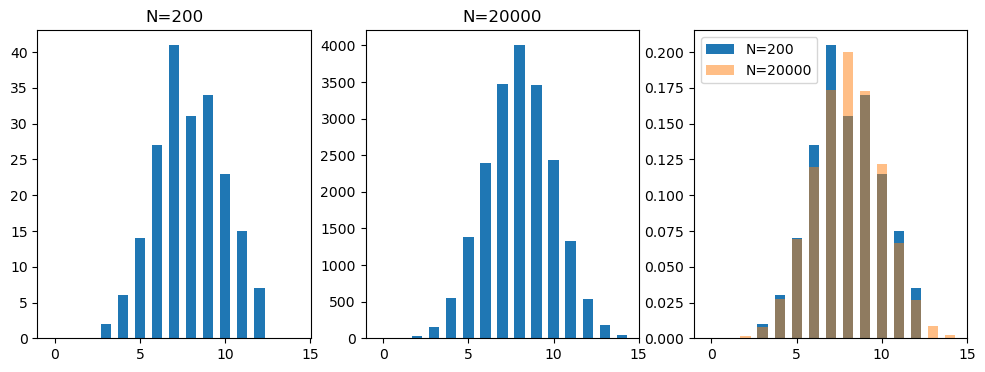

In [5]:
fig, ax = plt.subplots(1,3, figsize=(12,4))    
np.random.seed(42)
N = [200, 20000]

for m,k in enumerate (N):
    # size = number of time you repeat the experiment -i.e. 16 coin tosses
    y = scipy.stats.binom.rvs(16, 0.5, size=k)       # N trials of 16 flip toss using scipy 
#    y = np.random.binomial(n=16, p=0.5, size=k) # N trials of 16 flip toss using numpy

    ax[m].hist(y, bins=15, density=False, range=(0,15), 
               align='left',  rwidth=0.6)
    
    ax[2].hist(y, bins=15, density=True, range=(0,15), 
               align='left', label='N=%i'%N[m], alpha=1-0.5*m, rwidth=0.6)
    
    print('Mean = %.2f, Std = %.2f'%(np.mean(y), np.std(y)))
    
[ax[j].set_title('N=%i'%N[j]) for j in range(2)]

ax[2].legend()

Thus we can see that increasing $n$ does **not** decrease the standard deviation. This is the probability density function associated to our experiment (a binomial law). 

However, as you see, if you repeat your experiment a large number of times, you derive the properties of this distribution more accurately! This is the reason why the *standard error on the mean of the distribution* will **decrease** when $n$ increases. 

Let's consider $n = 1, 20, 2000, 20000$. Note that below, the function `scipy.stats.sem()` calculates the standard error on the mean for you. 

In [14]:
n_size = [2, 20, 2000, 20000]
for i in n_size:
    sample = scipy.stats.binom.rvs(16, 0.5, size=i)
    stde = scipy.stats.sem(sample)
    stde_explicit = np.std(sample, ddof=1) / np.sqrt(i)
    print('Sample n = %i: stde (sem) = %.4f ; stde (explicit formula)= %.4f' %(i, stde, stde_explicit ))

Sample n = 2: stde (sem) = 3.0000 ; stde (explicit formula)= 3.0000
Sample n = 20: stde (sem) = 0.3914 ; stde (explicit formula)= 0.3914
Sample n = 2000: stde (sem) = 0.0443 ; stde (explicit formula)= 0.0443
Sample n = 20000: stde (sem) = 0.0141 ; stde (explicit formula)= 0.0141


#### II.1.2.2. Illustration of the Bessel's correction for $s^2$: 

We can empirically demonstrate Bessel’s correction by generating many samples of $n=5$ from a standard Gaussian $\mathcal{N}(\mu=4,\sigma=1)$ and calculating the uncorrected sample standard deviation for each set of 5. A histogram of the uncorrected sample standard deviations should have a mean noticeably below 1, while the corrected sample standard deviation should have a mean closer to 1. To calculate the corrected and uncorrected samples, we can use `np.std`; for the corrected sample, we can set `ddof = 1` whereas for the uncorrected sample, numpy defaults `ddof = 0`. The divisor used by numpy is $n-\rm{ddof}$, where $n$ represents the number of elements.

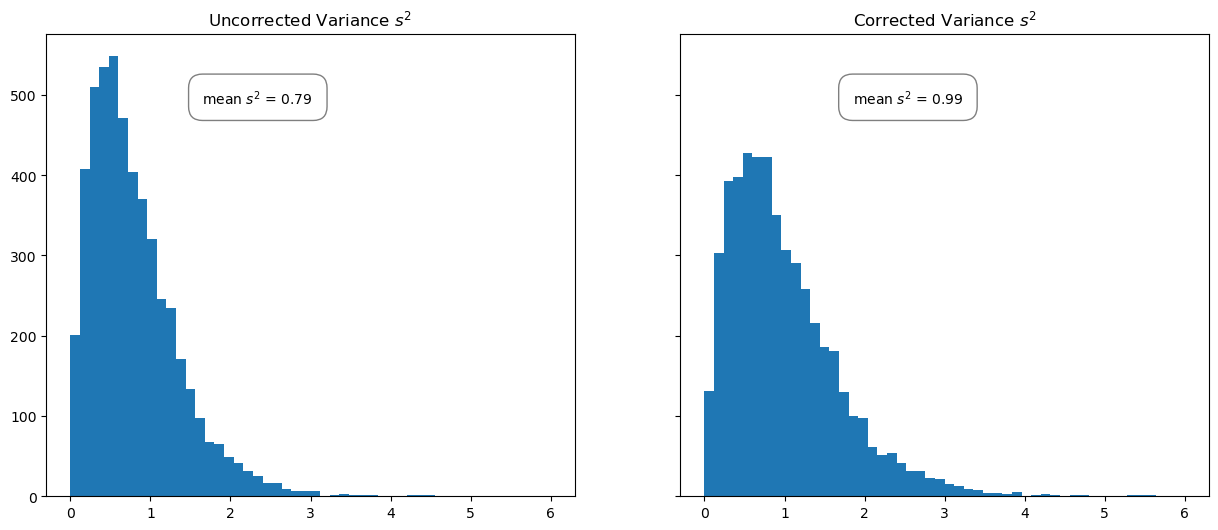

In [6]:
nsamp = 5000
uncorrected = np.zeros(nsamp)
corrected = np.zeros(nsamp)
for i in range(1, nsamp):
    samples = np.random.normal(loc=4.0, scale=1.0, size = 5)
    uncorrected[i] = np.var(samples, ddof=0)
    corrected[i] = np.var(samples, ddof=1)

fig, ax = plt.subplots(1,2, sharex=True, sharey=True)
fig.set_size_inches(15,6)   
ax[0].hist(uncorrected, bins=50,  range=(0,6))
ax[1].hist(corrected, bins=50, range=(0,6))
y1,y2 = ax[0].get_ylim()
ax[0].text(1.65, 0.85*y2, f'mean $s^2$ = {np.mean(uncorrected):.2}',
        bbox={'facecolor':'white', 'alpha':0.5, 'pad':1, 'boxstyle':"round"})
ax[1].text(1.85, 0.85*y2, f'mean $s^2$ = {np.mean(corrected):.2}',
        bbox={'facecolor':'white', 'alpha':0.5, 'pad':1, 'boxstyle':"round"})
ax[0].set_title("Uncorrected Variance $s^2$");
ax[1].set_title("Corrected Variance $s^2$");

We expect the biased sample to underestimate the population variance, which we can see in the graph on the left. 

**Note** If you do the same exercise and calculate the standard deviation instead of the variance (`np.var()` -> `np.std()`), you will see that the std remains slightly biased after Bessel's correction, while the variance is unbiased! 

### II.1.3 Distributions of estimators

Given a random variable $\{X_i\}$ whose population is $\mathcal{N}(\mu, \sigma)$, the pdf of the following variable/estimators are: 

* Sampling distribution of $\hat{\mu}$, when $\sigma$ is known, is a normal distribution 
$$
\hat{\mu} ~ \sim ~ \mathcal{N}(\mu, \sigma/\sqrt{n})
$$ 
Equivalently, we can make a change of variable, and consider 
the random variable: 
$$
Z = \frac{\bar{X}-\hat{\mu}} { (\sigma/\sqrt{n}) } ~ \sim ~ \mathcal{N}(0,1) 
$$ 
 
* Sampling distribution of 
$$
t= \frac{ \bar{X}-\hat{\mu} } {(s/\sqrt{n}) } ~ \sim ~ t(n-1)
$$
is a student distribution. It is not a normal distribution, because $\sigma$ is unknown (that's why we use s in the expression above).    
* The sampling distribution of 
$$
S = \frac{ (n-1) s^2 } {\sigma^2 } ~ \sim ~ \chi^2(n-1). 
$$ 
is a $\chi^2$ distribution.$s^2$ is the sample variance; S is sometimes called "normalised variance".

#### II.1.3.1 Estimator efficiency

Estimators can be compared in terms of their efficiency, which measures how large a sample is required to obtain a given accuracy. While the median is more robust to outliers, it is less *efficient* than the mean. For example, the median determined from data drawn from a Gaussian distribution shows a scatter around the true location parameter, $\mu$, larger by a factor of $\sqrt{\pi /2.} \sim 1.253$ than the scatter of the mean value. To show it, one can use the formula of the standard error on the pth quartile, $stde(q^{p}$), given in [II.1.2.](#II.1.2-Summary-of-useful-statistics). We have for a Gaussian that $h_{50} = 1/(\sqrt{2\pi} s)$, hence $stde(q^{50}) = s \, \sqrt{\frac{\pi}{2n}}$ (this has to be compared with $stde(\bar{x}) = \frac{s}{\sqrt{n}}$).  

An estimator is asymptotically normal if its distribution around the true value approaches a Gaussian distribution for large sample size, with variance decreasing proportionally to $1/n$. The smallest attainable variance for an unbiased estimator is called the minimum variance bound (MVB) and such an estimator is called the minimum variance unbiased estimator (MVUE).

#### II.1.3.2. Robustness of estimators

A common question that arises in data analysis is whether to consider the median or the mean as an estimator of $\mu$. The median is more robust / less affected by the presence of outliers. By outliers, we mean here data points that do not seem to be drawn from the same parent distribution / that look extreme. 

The standard deviation is also a poor estimator of the scale parameter of the distribution (i.e. $s$ is a poor estimator of $\sigma$) in presence of outliers. In that situation, the interquartile range **IQR**$=(q_{75}-q_{25})$ becomes a more robust estimator of the standard deviation. Beware however that the interquartile is NOT equal to the standard deviation. In case of a Gaussian distribution, one often use a renormalised interquartile range so that the width estimator $s_G = 0.7413 * (q_{75} - q_{25})$ becomes an unbiased estimator of $\sigma$. A simple way to evaluate this "rescaling" factor is to compare the probability enclosed within $[\bar{x}-\sigma, \bar{x}+\sigma]$ and the one enclosed within the interquartile range (i.e. 0.5). 

Other robust estimators of the scale factor of a distribution exist. Another common estimator is the "Median Absolute Deviation" or **MAD**. It is defined as 

$$
MAD = \rm{median}(|x - \tilde{x}|) 
$$

where $\tilde{x} = \rm{median}(x)$. The scale estimator is proportional to the MAD. For a Gaussian distribution, one has $\rm{MAD} = \sigma \, \sqrt{2} \, \rm{erf}^{-1}(1/2) \sim 0.67449 \, \sigma$. So, the MAD is smaller than the IQR and corresponds to half of it (for a Gaussian distribution). As we can verify, we have $s_G = k * IQR = 2 * k * MAD$, with k = 0.7413. Since scipy 1.5, the function [`scipy.stats.median_abs_deviation()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.median_abs_deviation.html) enables one to calculate the MAD based on a data set. The convertion to std then needs to be performed manually. Within `astropy`, the method [`astropy.stats.mad_std()`](https://docs.astropy.org/en/stable/api/astropy.stats.mad_std.html) enables to make the calculation of the MAD *and* convert it to an std. Other robust estimator of a distribution scale exist as outlined [here](https://en.wikipedia.org/wiki/Robust_measures_of_scale). 

#### Exercise: Estimators in presence of outliers 

This exercise aims at comparing the value of the mean and std of a distribution with and without outliers. For this purpose: 
- Generate a sample (sample_1) of 100 data points drawn from a normal distribution $\mathcal{N}(10, 2)$. 
- Generate a sample of 95 data points drawn from a normal distribution $\mathcal{N}(10, 2)$ and "add" to your sample 5 data points drawn from a cauchy distribution (`scipy.stats.cauchy`) with a "mean,std = (10, 20)". This new sample of 100 data points is called hereafter sample_2 
- Make two histograms showing sample_1 and sample_2. 
- Calculate the mean, median for the two samples. Which one is closest to the population mean (i.e. 10)? 
- Calculate the std and $s_G$ using the IQR and using the MAD, as explained above. Which one is closest to the population std (i.e. 2)?   
- The use of the MAD and of the IQR does not give exactly the same estimate of std, why? 

In [ ]:
# Create the 2 samples 
sample_1 = scipy.stats.norm
sample_2_norm = scipy.stats.norm
sample_2_cauchy = scipy.stats.cauchy.rvs(10, 20, )
sample_2 = np.concatenate([sample_2_norm, sample_2_cauchy])

In [ ]:
# Plot 2 histograms showing the 2 samples  
# (consider increasing the default number of bins for visualisation)
f, ax = plt.subplots(ncols=2, figsize=(10,5))
ax[0].hist(sample_1, bins=15);
ax[1].hist(sample_2, bins=15);

In [26]:
# Calculate the mean and median for the 2 samples 
mean_1, median_1 = 
mean_2, median_2 = 
print('Sample 1: mean = %.2f vs median = %.2f '%(mean_1, median_1))
print('Sample 2: mean = %.2f vs median = %.2f '%(mean_2, median_2))

Sample 1: mean = 9.94 vs median = 10.09 
Sample 2: mean = 11.31 vs median = 10.25 


In [27]:
# Calculate the std 
std_1 = np.std(sample_1, ddof=1)
std_2 = np.std(sample_2, ddof=1)
# Let's calculate sigG based on the IQR
PC_1 = np.percentile(sample_1, q=)
PC_2 = np.percentile(sample_2, q=)
IQR1 = PC_1[1] - PC_1[0]
IQR2 = PC_2[1] - PC_2[0]
sig_G1 = 0.7413 * IQR1
sig_G2 = 0.7413 * IQR2
# Now, let's do it based on the MAD (assuming we have a gaussian distribution)
MAD1 = scipy.stats.(sample_1)
MAD2 = scipy.stats.(sample_2)
sig_G1_from_MAD = 2 * 0.7413 * MAD1
sig_G2_from_MAD = 2 * 0.7413 * MAD2
print('Sample 1: std = %.2f vs sig_G = %.2f vs sig_G_MAD = %.2f' %(std_1, sig_G1, sig_G1_from_MAD))
print('Sample 2: std = %.2f vs sig_G = %.2f vs sig_G_MAD = %.2f' %(std_2, sig_G2, sig_G2_from_MAD))

Sample 1: std = 2.26 vs sig_G = 2.15 vs sig_G_MAD = 2.08
Sample 2: std = 6.52 vs sig_G = 2.06 vs sig_G_MAD = 2.10


In [28]:
# Std using astropy.stats.mad_std()  
import astropy.stats

MAD_std1 = astropy.stats.mad_std(sample_1)  
MAD_std2 = astropy.stats.mad_std(sample_2)  

print('Sample 1: MAD STD : %.2f' %MAD_std1)
print('Sample 2: MAD STD : %.2f' %MAD_std2)

Sample 1: MAD STD : 2.08
Sample 2: MAD STD : 2.10


We notice the large std for sample 2. The MAD and the IQR yield estimates of the the std that are closer to the population (i.e. $\sigma=2$) demonstrating a lower sensitivity to outliers ! 

In [ ]:
# If we want to convince ourselves of the efficacy of those alternative statistics 
# we may not rely on a single realisation but repeat the calculation many times
# Feel free to try it. 

## Summary

- Quantities we have access/are evalutating through measurements are *estimator* of the population statistics. Since they are based on samples drawn from the population, we speak of sample statistics. We write $\hat{\theta}$ the estimator of $\theta$. An estimator is a function of random variables, and is therefore a random variable with a specific distribution (i.e. PDF). 
- The central limit theorem states that when independant random variables are *added*, their sum tends towards a normal distribution, even if they individually do not follow a normal distribution.  
- We have reviewed how the main (sample) statistics are calculated 
- The distribution of the sample mean $\bar{x}$ (of a sample of random variables) is a normal (gaussian) distribution if the standard standard deviation of the population is known. In general, the standard deviation is *not* known, and the estimator of the mean follows a Student distribution (see [Descriptive_statistics_02.ipynb](../03-Basic_statistics_and_proba_concepts/Descriptive_statistics_02.ipynb) to get the expression of the student's distribution). When the sample is large, the student's and gaussian distributions are almost undistinguishable. 
- The sample variance follows a $\chi^2$ distribution (see [Descriptive_statistics_02.ipynb](../03-Basic_statistics_and_proba_concepts/Descriptive_statistics_02.ipynb) to get the expression of the $\chi^2$ distribution). When the sample is large, the $\chi^2$ distribution becomes very similar to a gaussian distribution. 
- The median the the *renormalised interquartile (IQR)* can be used used to get more robust estimates of the location ("mean") and scale("standard deviation") of a distribution. Other robust estimator of the scale, such as the Median Absolute Deviation (MAD) also exist. There is however a price to pay: those (more) robust quantities are less *efficient* estimators: you need a larger sample to reach the same accuracy (typically 25\% larger in the Gaussian case for the IQR). 

## X. References and supplementary material: <a class="anchor" id="X"></a>

**Chapter 4** (4.1 4.2, 4.5, 4.7) of the book <a class="anchor" id="book"></a> *Statistics, data mining and Machine learning in astronomy* by Z. Ivezic et al. in Princeton Series in Modern Astronomy. See also the [online Notebook](https://www.astroml.org/astroML-notebooks/chapter3/astroml_chapter3_Descriptive_Statistics.html) associated to the edition 2019 of the book.  

The following [blog post](https://towardsdatascience.com/https-medium-com-aparnack-what-can-a-small-sample-teach-us-about-a-big-population-part-1-b7c048c22bf2) may explain you differently what *data samples* teach us about the *population*. 

*All of statistics: a concise course in statistical inference*, Wasserman 2004  <a class="anchor" id="WAS04"></a>(see also errata in http://www.stat.cmu.edu/~larry/all-of-statistics/): **Chapter 8, 9**

* *Statistics in theory and Practice*, Lupton 1993 <a class="anchor" id="LUP93"></a>: **Chapter 6, 7, 8, 9**

* [Numerical recipes](http://www2.units.it/ipl/students_area/imm2/files/Numerical_Recipes.pdf) by Press et al. Cambridge University press: **Chapter 14**

* *Penn State Lectures on statistics*: https://onlinecourses.science.psu.edu/stat414/  **STAT 415 Sect 6-7-8**

* *Penn State Lectures on statistics*: https://onlinecourses.science.psu.edu/stat200 **STAT 200 Sect. 8, 8, 9**

* *Scipy course on statistics* http://www.scipy-lectures.org/packages/statistics/index.html#id9
